<a href="https://colab.research.google.com/github/hannahmagedd609/Lungevity/blob/main/Copy_of_normal_mali_benign_RESNET50_IOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#upload google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import os
import cv2
from PIL import Image
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D,GlobalAveragePooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten

In [ ]:
image_directory = '/content/drive/MyDrive/CT-Scan images/CT-Scan images/CT-Scan Images/'
SIZE = 224
dataset = []
label = []

In [ ]:
normal_images = os.listdir('/content/drive/MyDrive/CT-Scan images/CT-Scan images/CT-Scan Images/Non-Cancerous raw images - jpg/')
for i, image_name in enumerate(normal_images):


        image = cv2.imread('/content/drive/MyDrive/CT-Scan images/CT-Scan images/CT-Scan Images/Non-Cancerous raw images - jpg/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(0)

In [ ]:
tumor_images = os.listdir('/content/drive/MyDrive/CT-Scan images/CT-Scan images/CT-Scan Images/Cancerous raw images-jpg/')
for i, image_name in enumerate(tumor_images):

        image = cv2.imread('/content/drive/MyDrive/CT-Scan images/CT-Scan images/CT-Scan Images/Cancerous raw images-jpg/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(1)

In [ ]:
dataset = np.array(dataset)
label = np.array(label)

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.20, random_state = 42)

In [ ]:
print ("Shape of an image in X_train: ", X_train[0].shape)
print ("Shape of an image in X_test: ", X_test[0].shape)

Shape of an image in X_train:  (224, 224, 3)
Shape of an image in X_test:  (224, 224, 3)


In [ ]:
from keras.applications import ResNet50

In [ ]:
resnet_model = Sequential()

prdeletrained_mo= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=1,
                   weights='imagenet')
for layer in prdeletrained_mo.layers:
        layer.trainable=False

resnet_model.add(prdeletrained_mo)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(1, activation='sigmoid'))

94765736/94765736 [==============================] - 3s 0us/step


In [ ]:

resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 24637313 (93.98 MB)
Trainable params: 1049601 (4.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [ ]:

resnet_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
 from tensorflow.keras.models import Model
history = resnet_model.fit(X_train,
                         y_train,
                         batch_size = 32,
                         verbose = 1,
                         epochs = 10,
                         validation_data=(X_test,y_test),
                         shuffle = False
                     )

Epoch 1/10
10/10 [==============================] - 12s 403ms/step - loss: 1.4357 - accuracy: 0.7216 - val_loss: 0.0510 - val_accuracy: 0.9863
Epoch 2/10
10/10 [==============================] - 1s 113ms/step - loss: 0.0679 - accuracy: 0.9691 - val_loss: 0.0161 - val_accuracy: 0.9863
Epoch 3/10
10/10 [==============================] - 1s 122ms/step - loss: 0.0150 - accuracy: 0.9931 - val_loss: 0.0223 - val_accuracy: 0.9863
Epoch 4/10
10/10 [==============================] - 1s 111ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 5/10
10/10 [==============================] - 1s 121ms/step - loss: 5.8763e-04 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 6/10
10/10 [==============================] - 1s 118ms/step - loss: 5.8240e-04 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 1s 106ms/step - loss: 3.3994e-04 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 

In [ ]:
from sklearn import metrics

In [ ]:
resnet_model.save('binary_classification.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


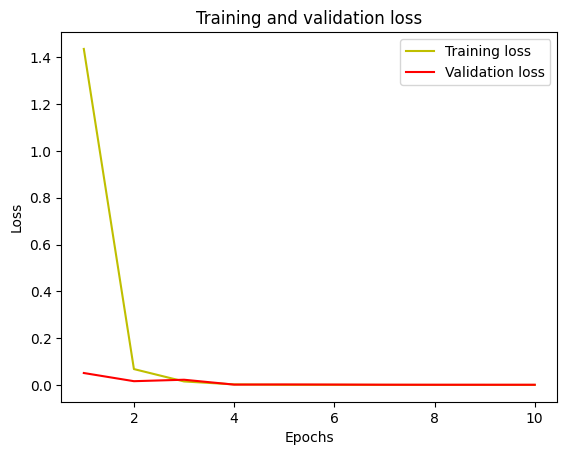

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

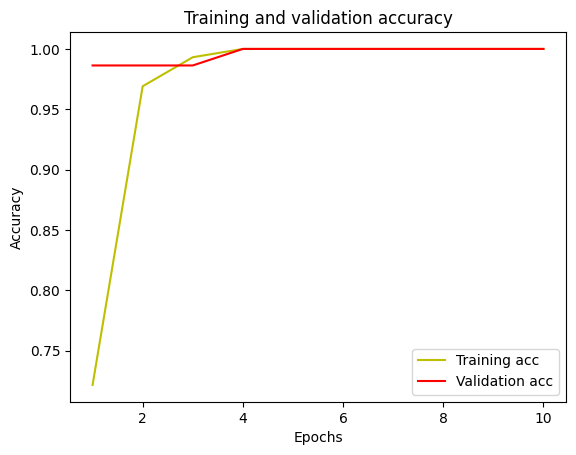

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(epochs, accuracy, 'y', label='Training acc')
plt.plot(epochs, val_accuracy, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
y_pred = resnet_model.predict(X_test)

3/3 [==============================] - 1s 116ms/step


In [ ]:
mythreshold= 0.005783
from sklearn.metrics import confusion_matrix

y_pred = (resnet_model.predict(X_test)>= mythreshold).astype(int)
cm=confusion_matrix(y_test, y_pred)
print(cm)

3/3 [==============================] - 0s 80ms/step
[[31  1]
 [ 0 41]]


In [ ]:
Accuracy = metrics.accuracy_score(y_test, y_pred)

In [ ]:
print(Accuracy)

0.9863013698630136


In [ ]:
print(Accuracy*100)

98.63013698630137


In [ ]:
Precision = metrics.precision_score(y_test, y_pred)

In [ ]:
print(Precision)

0.9761904761904762


In [ ]:
Sensitivity_recall = metrics.recall_score(y_test, y_pred)

In [ ]:
F1_score = metrics.f1_score(y_test, y_pred)

In [ ]:
#metrics
print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"F1_score":F1_score})

{'Accuracy': 0.9863013698630136, 'Precision': 0.9761904761904762, 'Sensitivity_recall': 1.0, 'F1_score': 0.9879518072289156}


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
from tensorflow.keras.models import Model

In [ ]:
model=Sequential()

In [ ]:
y_pred = model.predict(X_test)

3/3 [==============================] - 0s 6ms/step


In [ ]:
#cm = confusion_matrix(y_test,y_pred.round())

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

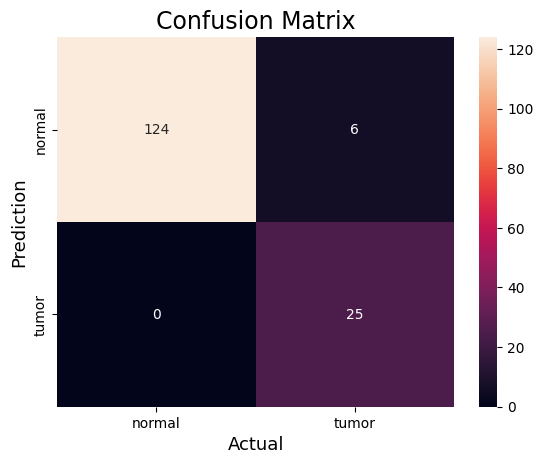

In [ ]:
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['normal', 'tumor'],
            yticklabels=['normal', 'tumor'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
image_directory_classify = '/content/drive/MyDrive/malignant vs benign/'
SIZE = 224
dataset = []
label = []

In [ ]:
malignant_images = os.listdir('/content/drive/MyDrive/malignant_vs_benign/Malignant cases/')
for i, image_name in enumerate(malignant_images):


        image = cv2.imread('/content/drive/MyDrive/malignant_vs_benign/Malignant cases/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(0)

In [ ]:
benign_images = os.listdir('/content/drive/MyDrive/malignant_vs_benign/Bengin cases/')
for i, image_name in enumerate(benign_images):

        image = cv2.imread('/content/drive/MyDrive/malignant_vs_benign/Bengin cases/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(1)

In [ ]:
dataset = np.array(dataset)
label = np.array(label)

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.2, random_state = 42)

In [ ]:
print ("Shape of an image in X_train: ", X_train[0].shape)
print ("Shape of an image in X_test: ", X_test[0].shape)

Shape of an image in X_train:  (224, 224, 3)
Shape of an image in X_test:  (224, 224, 3)


In [ ]:
from keras.applications import ResNet50

In [ ]:
resnet_model = Sequential()

prdeletrained_mo= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=1,
                   weights='imagenet')
for layer in prdeletrained_mo.layers:
        layer.trainable=False

resnet_model.add(prdeletrained_mo)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(1, activation='sigmoid'))

In [ ]:

resnet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               1049088   
                                                                 
 dense_3 (Dense)             (None, 1)                 513       
                                                                 
Total params: 24637313 (93.98 MB)
Trainable params: 1049601 (4.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [ ]:

resnet_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
 from tensorflow.keras.models import Model
history = resnet_model.fit(X_train,
                         y_train,
                         batch_size = 32,
                         verbose = 1,
                         epochs = 10,
                         validation_data=(X_test,y_test),
                         shuffle = False
                     )

Epoch 1/10
20/20 [==============================] - 10s 269ms/step - loss: 0.5185 - accuracy: 0.8979 - val_loss: 0.0685 - val_accuracy: 0.9806
Epoch 2/10
20/20 [==============================] - 2s 120ms/step - loss: 0.0414 - accuracy: 0.9806 - val_loss: 0.0489 - val_accuracy: 0.9806
Epoch 3/10
20/20 [==============================] - 2s 109ms/step - loss: 0.0364 - accuracy: 0.9789 - val_loss: 0.0356 - val_accuracy: 0.9935
Epoch 4/10
20/20 [==============================] - 2s 121ms/step - loss: 0.0286 - accuracy: 0.9870 - val_loss: 0.0261 - val_accuracy: 0.9871
Epoch 5/10
20/20 [==============================] - 2s 124ms/step - loss: 0.0176 - accuracy: 0.9935 - val_loss: 0.0303 - val_accuracy: 0.9871
Epoch 6/10
20/20 [==============================] - 2s 115ms/step - loss: 0.0094 - accuracy: 0.9984 - val_loss: 0.0359 - val_accuracy: 0.9871
Epoch 7/10
20/20 [==============================] - 2s 110ms/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.0257 - val_accuracy: 0.9871
Epoch

In [ ]:
from sklearn import metrics

In [ ]:
resnet_model.save('binary_classification.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


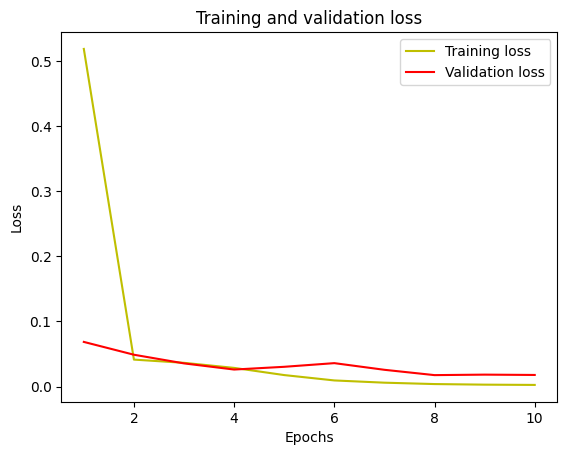

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

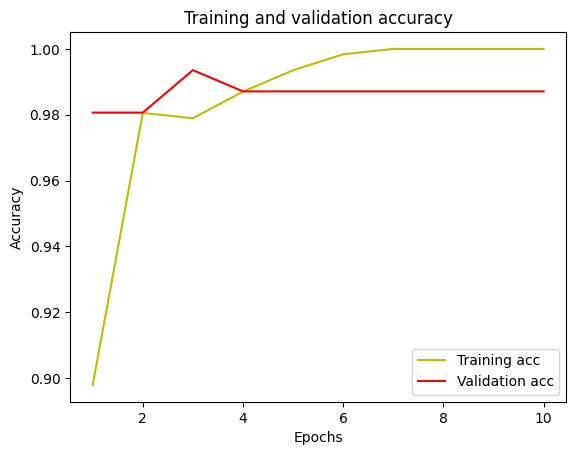

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(epochs, accuracy, 'y', label='Training acc')
plt.plot(epochs, val_accuracy, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
y_pred = resnet_model.predict(X_test)

5/5 [==============================] - 2s 107ms/step


In [ ]:
mythreshold= 0.005783
from sklearn.metrics import confusion_matrix

y_pred = (resnet_model.predict(X_test)>= mythreshold).astype(int)
cm=confusion_matrix(y_test, y_pred)
print(cm)

5/5 [==============================] - 0s 87ms/step
[[124   6]
 [  0  25]]


In [ ]:
Accuracy = metrics.accuracy_score(y_test, y_pred)

In [ ]:
print(Accuracy)

0.9612903225806452


In [ ]:
print(Accuracy*100)

96.12903225806451


In [ ]:
Precision = metrics.precision_score(y_test, y_pred)

In [ ]:
print(Precision)

0.8064516129032258


In [ ]:
Sensitivity_recall = metrics.recall_score(y_test, y_pred)

In [ ]:
F1_score = metrics.f1_score(y_test, y_pred)

In [ ]:
#metrics
print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"F1_score":F1_score})

{'Accuracy': 0.9612903225806452, 'Precision': 0.8064516129032258, 'Sensitivity_recall': 1.0, 'F1_score': 0.8928571428571428}


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
from tensorflow.keras.models import Model

In [ ]:
model=Sequential()

In [ ]:
y_pred = model.predict(X_test)

5/5 [==============================] - 0s 7ms/step


In [ ]:
#cm = confusion_matrix(y_test,y_pred.round())

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

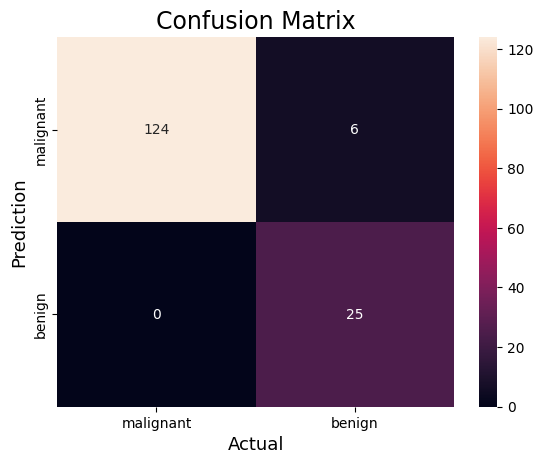

In [ ]:
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['malignant', 'benign'],
            yticklabels=['malignant', 'benign'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
predictions = model.predict(X_test)

5/5 [==============================] - 0s 6ms/step


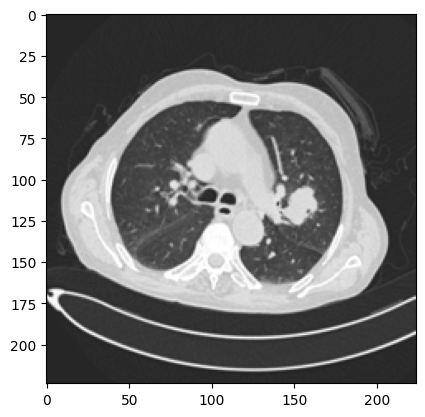

In [ ]:
plt.imshow(X_train[9])

In [ ]:
import numpy as np
np.argmax(predictions[27])


23889

In [ ]:
print(predictions[27])

[[[38 38 38]
  [38 38 38]
  [38 38 38]
  ...
  [38 38 38]
  [38 38 38]
  [38 38 38]]

 [[38 38 38]
  [38 38 38]
  [38 38 38]
  ...
  [38 38 38]
  [38 38 38]
  [38 38 38]]

 [[38 38 38]
  [38 38 38]
  [38 38 38]
  ...
  [38 38 38]
  [38 38 38]
  [38 38 38]]

 ...

 [[38 38 38]
  [38 38 38]
  [38 38 38]
  ...
  [38 38 38]
  [38 38 38]
  [38 38 38]]

 [[38 38 38]
  [38 38 38]
  [38 38 38]
  ...
  [38 38 38]
  [38 38 38]
  [38 38 38]]

 [[38 38 38]
  [38 38 38]
  [38 38 38]
  ...
  [38 38 38]
  [38 38 38]
  [38 38 38]]]


In [ ]:
print(label)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
print(label[27])

0


In [ ]:
print(label[700])

1


In [ ]:
pip install paho-mqtt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.4/99.4 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for paho-mqtt: filename=paho_mqtt-1.6.1-py3-none-any.whl size=62120 sha256=8bf60d160d1e11de60f0723da7642ae28bcd19ceebe0ca2ffbb24fdcce99da22
  Stored in directory: /root/.cache/pip/wheels/8b/bb/0c/79444d1dee20324d442856979b5b519b48828b0bd3d05df84a
Successfully built paho-mqtt


In [ ]:
import paho.mqtt.client as mqtt
import time

In [ ]:
# Callback function to handle connection established event
def on_connect(client, userdata, flags, rc):
    print("Connected with result code " + str(rc))
    # Subscribe to a topic upon successful connection
    client.subscribe("LUNG_CANCER")

# Callback function to handle received messages
def on_message(client, userdata, msg):
    print("Received message: " + msg.payload.decode())

# Create an MQTT client instance
client = mqtt.Client()

# Set the callback functions
client.on_connect = on_connect
client.on_message = on_message

In [ ]:
# Connect to the MQTT broker
client.connect("mqtt-dashboard.com", 1883, 60)


0

In [ ]:
client.loop_start()


In [ ]:



Result='';
if (label[27]==0):
  Result="malignant_case&age=40"
  print('malignant_case&age=40')
  client.publish("M", Result)

else:
  Result="benign_case&age=40"
  print('benign_case&age=40')
  client.publish("B", Result)







malignant_case&age=40
